In [3]:
import torch


In [4]:
from torchvision import transforms
from torch.utils.data import DataLoader


In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [6]:
device

'cuda'

1. Get data

In [7]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the inage floder doesn't exist , download it and prepare it

if image_path.is_dir():
    print(f"{image_path} already exists")

else:
    print(f"{image_path} creating one")

    image_path.mkdir(parents=True,exist_ok=True)


data\pizza_steak_sushi already exists


# 2. data preparation and data exploration

In [8]:
import os

def walk_through_dir(path):

    for dirpath ,dirnames , filenames in os.walk(path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [9]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [10]:
# Setup train and test paths
train_dir = image_path / "train"

test_dir = image_path / "test"

# 2.1 Visualizing and image

let'write some code to :
1. Get all of the image paths
2. pick a random image path using python's random.choice()
3. Get the image class name using 'pathlib.Path.parent.stem'
4. Since we are working with images , let's open the image with python's PIL (pillow)
5. we will then show the image and print metadata

In [11]:
import random
from PIL import Image

random.seed(42)

# 1.
image_path_list = list(image_path.glob("*/*/*.jpg"))


image_path_list[:10]

[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/195160.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2124579.jpg')]

In [12]:
#2. 
random_image_path = random.choice(image_path_list)
print(random_image_path)

data\pizza_steak_sushi\test\sushi\2394442.jpg


In [13]:
# 3. get image class from path name

image_class = random_image_path.parent.stem
print(image_class)


sushi


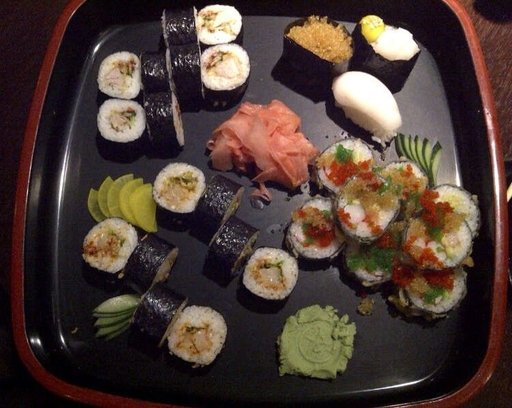

In [14]:
# 4. 
img = Image.open(random_image_path)

img

In [15]:
# 5. print meta data
print(f"Random image path: {random_image_path}")
print(f"image class:{image_class}")
print(f"image height: {img.height}")
print(f"Image width: {img.width}")

Random image path: data\pizza_steak_sushi\test\sushi\2394442.jpg
image class:sushi
image height: 408
Image width: 512


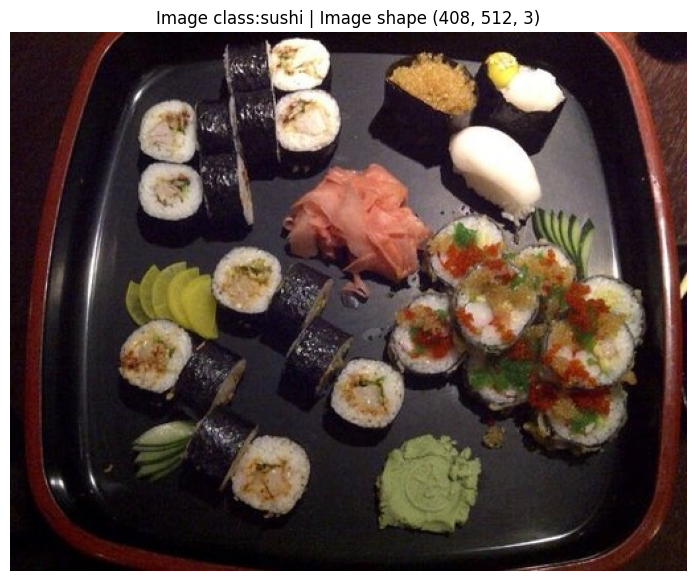

In [16]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class:{image_class} | Image shape {img_as_array.shape}")
plt.axis(False);

3. Transforming data

Before we can use our image data with Pytorch:
1. Turn your target data into tensors(in our case, numerical representation of our images).
2. Turn it into a 'torch.utils.data.dataset' and subsequently a 'torch.utils.data.dataloader' , we will call these 'Dataset' and 'Dataloader'



In [17]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets , transforms

In [18]:
# Transforming data with torchvision.transforms

## can use nn.squencial or transforms.Compose
data_transform = transforms.Compose([
    # Resize our images to (64,64)
    transforms.Resize(size=(64,64)),

    #Flip the image randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),

    # Turn the image into a torch.tensor
    transforms.ToTensor()
])

In [19]:
data_transform(img).shape

torch.Size([3, 64, 64])

In [20]:
def plot_transformed_image(image_paths:list,transform,n=3,seed=42):

    if seed:
       random.seed(seed)

    random_image_path = random.sample(image_paths,k=n)
    for image_path in random_image_path:
        with Image.open(image_path) as f:
            fig,ax = plt.subplots(nrows=1,ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)

            #Transform and plot target image

            transformed_image = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis("off")
            fig.suptitle(f"Class:{image_path.parent.stem}",fontsize = 16)


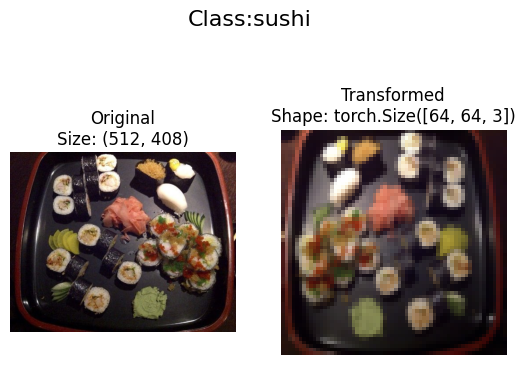

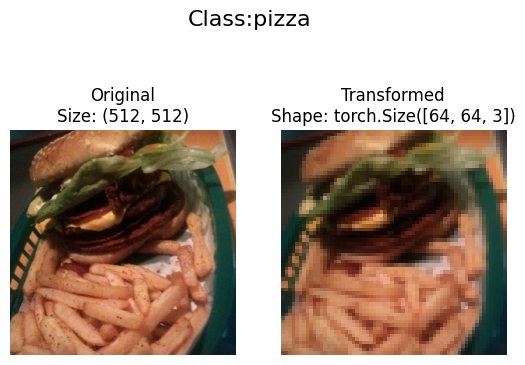

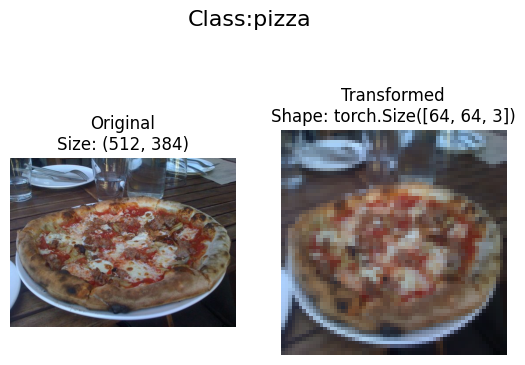

In [21]:
plot_transformed_image(image_paths=image_path_list,transform=data_transform)

# 4. Option 1 : Loading image data using ImageFolder

In [22]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform,
                                 target_transform=None)



In [23]:
train_data , test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [24]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [25]:
class_name = train_data.classes

In [26]:
class_name

['pizza', 'steak', 'sushi']

In [27]:
len(train_data) , len(test_data)

(225, 75)

In [28]:
img , label = train_data[0][0] , train_data[0][1]

print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.09

Text(0.5, 1.0, 'pizza')

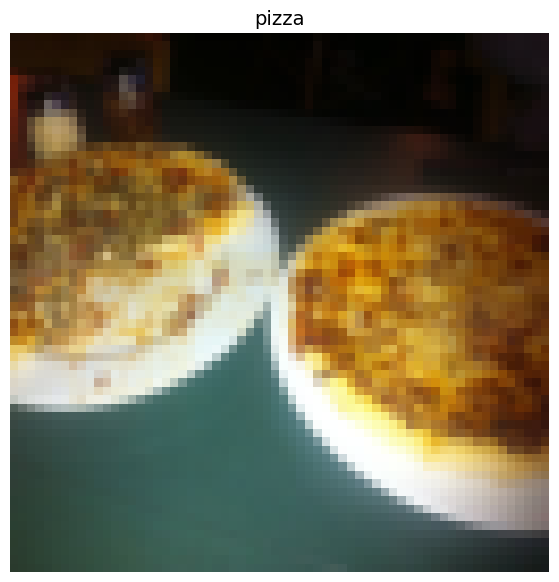

In [29]:
img_permute = img.permute(1,2,0)

plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_name[label],fontsize=14)


In [30]:
import os
os.cpu_count()

16

In [31]:
from torch.utils.data import DataLoader

BATCH_SIZE = 1 

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)


In [32]:
# check out what's inside the training dataloader

train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

# 5. Option 2: Loading Image data with a custom 'Dataset'

1. Want to be able to load images from file

2. Want to be able to get class names form the dataset

3. Want to be able to get classes as dictionary from the Dataset

In [33]:
import os
import pathlib

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple , Dict ,List

In [34]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes , train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

# 5.1 Creating a helper function to get class names

we want a function to :
1. Get the class names using 'os.scandir()' to traverse a target directory (ideally the directory is in standard image classification format).
2. Raise an error if the class names are not found (if this happens , there might be something wrong with the directory structure).
3. Turn the class names into a dict and a list and return them.


In [35]:
# Setup path for target directory

target_directory = train_dir
print(f"Target dir: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data\pizza_steak_sushi\train


['pizza', 'steak', 'sushi']

In [36]:
def find_classes(directory: str) -> Tuple[List[str],Dict[str,int]]:
    """
    finds class folder names in a target in a target directory.
    """
    # 1. Get the class names by scanning the target directory

    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. Raise an error if class names could not be found
    if not classes:
        raise FileNotFoundError(f"no classesin : {directory}")
    

    # 3. Create a dictionary of index labels
    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}


    return classes , class_to_idx

In [37]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

# 5.2 Create a custom 'Dataset' to replicate 'ImageFolder()'

To create our own custom dataset, we want to:
1. subclass 'torch.utils.data.Dataset'
2. Init our subclass with a target directory (the directory we'd like to get data from) as well as a transform if we'd like to transform our data.
3. Create several attributes:
    * paths - paths of our images
    * transform - the transform we'd like to use 
    * classes -  a list of the target classes
    * class_to_idx - a dict of the target classes mapped to integer labels
4. Create a function to 'load_image()', this function will open an image 
5. Overwrite the '__len()__' method to return the length of our dataset
6. Overwrite the '__getiteam()__' method to return a given sample when passed an index

In [38]:
# Write a custom dataset class
from torch.utils.data import Dataset

# 1. subclass torch.utils.data.Dataset

class ImageFolderCustom(Dataset):
    # 2. Initialize our custom dataset
    def __init__(self,targ_dir:str,transform = None):
        
        # 3. Create class attributes
        # Get all of the image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))

        # Setup transforms

        self.transform = transform

        # Create classes and class_to_idx attributes

        self.classes , self.class_to_idx = find_classes(targ_dir)


    # 4. Create a function to load images
    def load_image(self,index:int) -> Image.Image:
        "Opens an image via a path and returns it."

        image_path = self.paths[index]

        return Image.open(image_path)
    
    # 5. Overwrite __len__()
    def __len__(self) -> int:
        "Return the total number of samples."

        return len(self.paths)
    
    # 6. Overwrite __getitem()__ metod to return a particular sample

    def __getitem__(self, index:int) -> Tuple[torch.Tensor,int]:
        "returna one sample of data, data and label(X,Y)"

        img = self.load_image(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]

        # transform if necessary

        if self.transform:
            return self.transform(img) , class_idx
        else:
            return img , class_idx
        

In [39]:
from torchvision import transforms

train_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.ToTensor()])


test_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                      transforms.ToTensor()])

In [40]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transform)

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transform)

# 5.3 Create a function to display random images

1. Take in a 'Dataset' and a number of other parameters such as class names and how many images to visualize
2. To prevent the display getting out of hand, let's cap the number of images to see at 10.
3. Set the random seed for reproducibility
4. Get a list of random sample indexes from the target dataset.
5. Setup a matplotlib plot.
6. Loop through the random sample image and plot them with matploltib.
7. Make sure the dimensions of our images line up with matplotlib(HWC)


In [48]:
# 1. Create a function to take in a dataset
import torch.utils
import torch.utils.data


def display_random_images(dataset:torch.utils.data,
                          classes:List[str] = None,
                          n:int = 10,
                          display_shape:bool = True,
                          seed:int = None):
    
    # 2
    if n > 10 :
        n=10
        display_shape = False
        print(f"For display,purposes,n shouldn't be larger than 10 , setting to 10 and removing shape display.")

    # 3
    if seed:
        random.seed(seed)

    
    # 4
    random_samples_idx = random.sample(range(len(dataset)) , k=n)


    # 5 
    plt.figure(figsize=(16,8))

    # 6 

    for i, targ_sample in enumerate(random_samples_idx):
        targ_image , targ_label = dataset[targ_sample][0] , dataset[targ_sample][1]


        # 7 
        targ_image_adjust = targ_image.permute(1,2,0)

        plt.subplot(1,n,i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")

        if classes:
            title = f"Class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"

        plt.title(title)



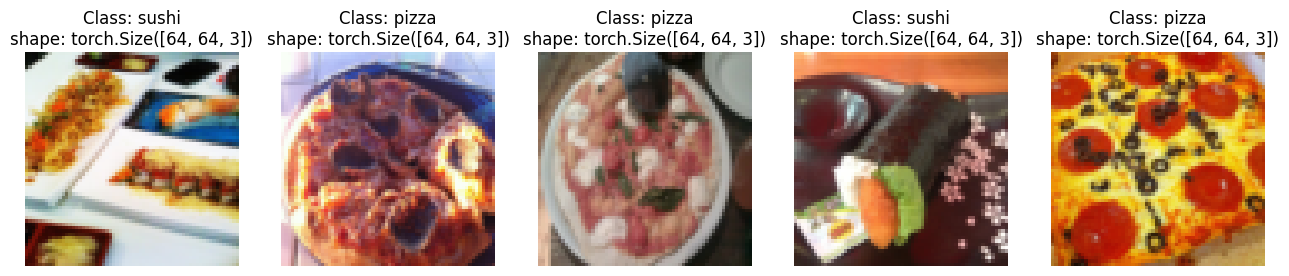

In [49]:
display_random_images(dataset=train_data_custom,
                      n=5,
                      classes=class_name,
                      seed=42)